### Part A

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
%matplotlib inline

In [3]:
#Reading the csv file 

dataset = pd.read_csv("CE802_P3_Data.csv")


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   object 
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

In [5]:
# There are around 1500 rows and all the columns have some values without any null values 
# we will search for columns with object and int as data type 

In [6]:
dataset["F5"]

0       Very high
1       Very high
2             Low
3       Very high
4        Very low
          ...    
1495          Low
1496         High
1497         High
1498          Low
1499         High
Name: F5, Length: 1500, dtype: object

In [7]:
dataset["F5"].value_counts()

Very low     307
High         307
Very high    306
Medium       294
Low          286
Name: F5, dtype: int64

In [8]:
dataset["F26"]

0       21
1       12
2        6
3        3
4       15
        ..
1495    12
1496    15
1497     9
1498    18
1499     9
Name: F26, Length: 1500, dtype: int64

In [9]:
dataset["F26"].value_counts()

12    333
9     292
15    273
6     214
18    158
3      90
21     84
24     33
0      15
27      6
30      1
33      1
Name: F26, dtype: int64

In [10]:
dataset["F27"]

0        8
1       10
2        4
3       12
4        8
        ..
1495    10
1496    18
1497     2
1498    10
1499     6
Name: F27, Length: 1500, dtype: int64

In [11]:
dataset["F27"].value_counts()

6     330
8     307
10    269
4     174
12    159
2      97
14     82
16     33
0      32
18     16
20      1
Name: F27, dtype: int64

In [12]:
dataset["F34"]

0          USA
1       Europe
2       Europe
3       Europe
4           UK
         ...  
1495      Rest
1496        UK
1497       USA
1498    Europe
1499      Rest
Name: F34, Length: 1500, dtype: object

In [13]:
dataset["F34"].value_counts()

Europe    393
USA       378
Rest      365
UK        364
Name: F34, dtype: int64

In [14]:
#Implementation of label Encoder to normalize the labels 

label_encoder = LabelEncoder()
dataset["F5"] = label_encoder.fit_transform(dataset["F5"])
dataset["F34"] = label_encoder.fit_transform(dataset["F34"])

In [15]:
dataset.head(5).transpose()

,0,1,2,3,4
F1,25.46,60.52,9.27,-41.74,68.15
F2,-225.08,-209.14,-319.00,-233.16,-279.80
F3,-177.02,-202.85,-185.33,-206.10,-172.72
F4,137.97,85.50,61.49,114.58,95.61
F5,3.00,3.00,1.00,3.00,4.00
F6,4.08,16.80,9.12,19.23,12.33
F7,-140.19,-248.01,-151.20,-161.76,-162.03
F8,15882.39,10796.76,8993.31,8527.65,17019.57
F9,-3728.44,-2575.88,-4532.70,-4896.54,-4590.98
F10,-145.22,-233.30,-176.56,-108.32,-143.82


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F1', ylabel='Density'>

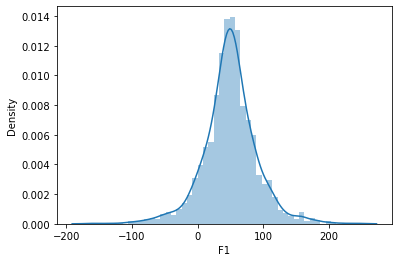

In [16]:
sns.distplot(dataset["F1"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F2', ylabel='Density'>

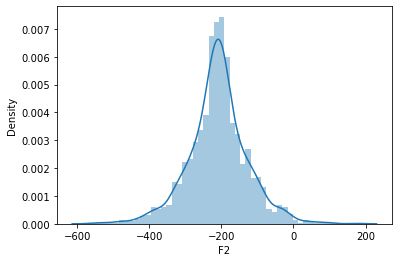

In [17]:
sns.distplot(dataset["F2"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F3', ylabel='Density'>

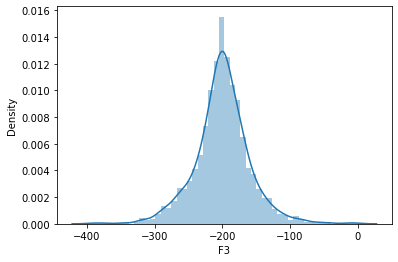

In [18]:
sns.distplot(dataset["F3"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F4', ylabel='Density'>

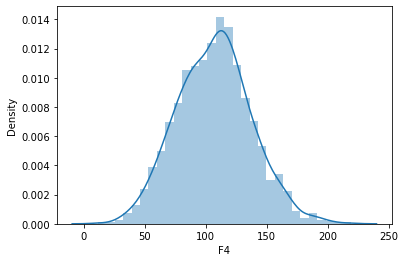

In [19]:
sns.distplot(dataset["F4"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F5', ylabel='Density'>

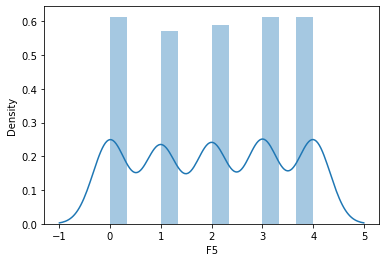

In [20]:
sns.distplot(dataset["F5"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F6', ylabel='Density'>

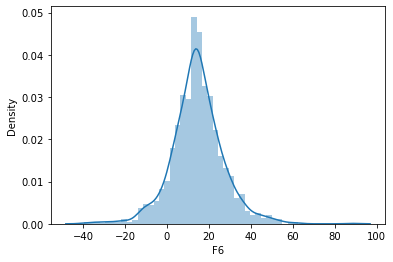

In [21]:
sns.distplot(dataset["F6"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F7', ylabel='Density'>

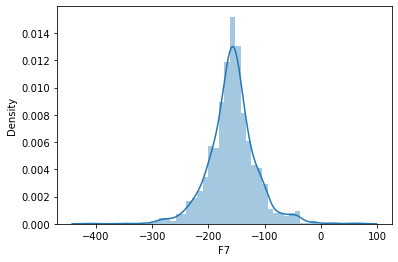

In [22]:
sns.distplot(dataset["F7"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F8', ylabel='Density'>

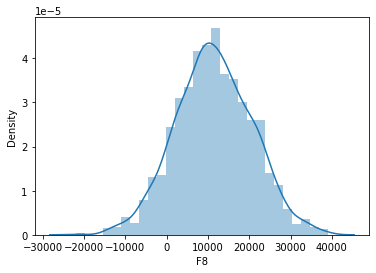

In [23]:
sns.distplot(dataset["F8"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F9', ylabel='Density'>

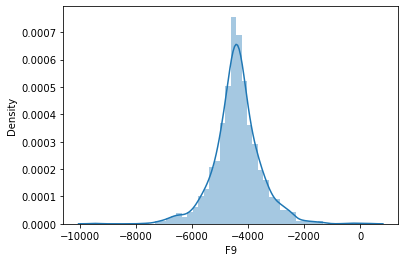

In [24]:
sns.distplot(dataset["F9"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F10', ylabel='Density'>

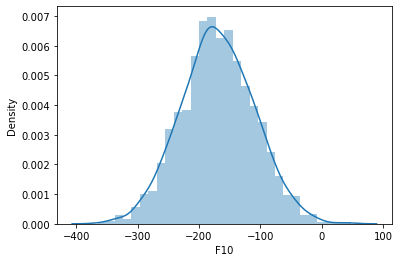

In [25]:
sns.distplot(dataset["F10"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F11', ylabel='Density'>

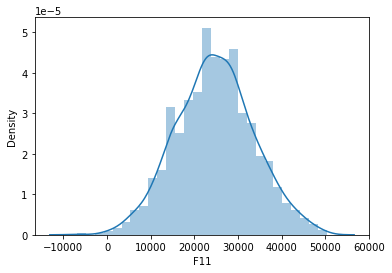

In [26]:
sns.distplot(dataset["F11"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F12', ylabel='Density'>

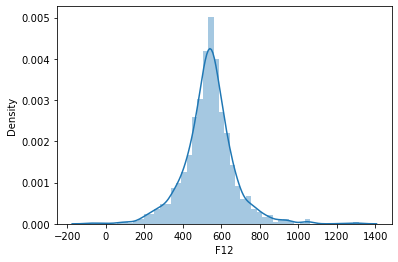

In [27]:
sns.distplot(dataset["F12"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F13', ylabel='Density'>

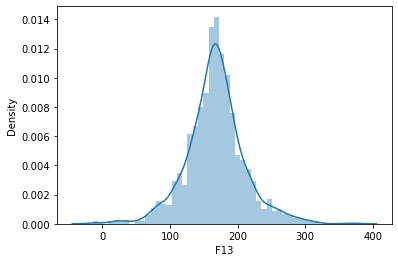

In [28]:
sns.distplot(dataset["F13"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F14', ylabel='Density'>

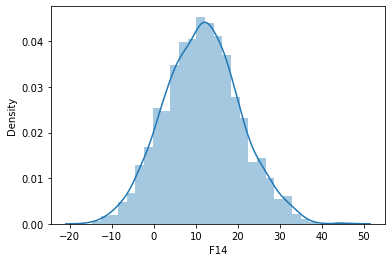

In [29]:
sns.distplot(dataset["F14"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F15', ylabel='Density'>

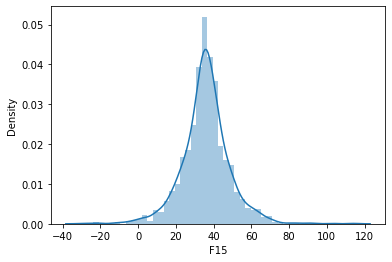

In [30]:
sns.distplot(dataset["F15"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F16', ylabel='Density'>

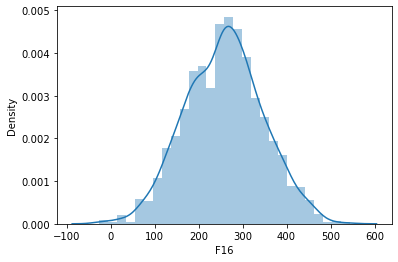

In [31]:
sns.distplot(dataset["F16"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F17', ylabel='Density'>

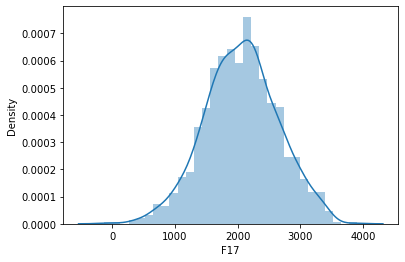

In [32]:
sns.distplot(dataset["F17"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F18', ylabel='Density'>

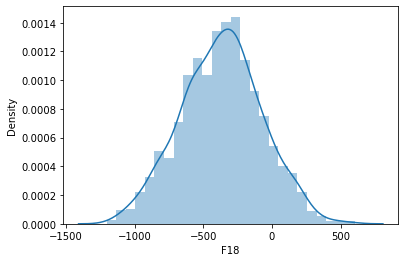

In [33]:
sns.distplot(dataset["F18"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F19', ylabel='Density'>

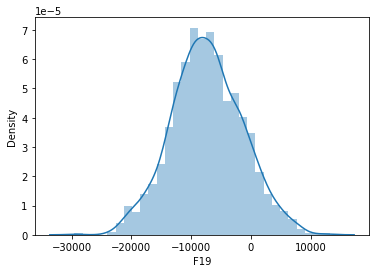

In [34]:
sns.distplot(dataset["F19"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F20', ylabel='Density'>

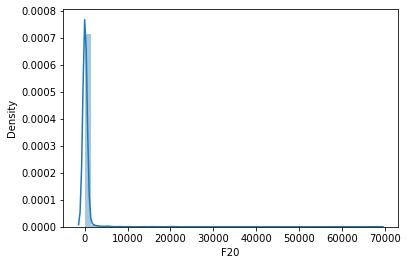

In [35]:
sns.distplot(dataset["F20"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F21', ylabel='Density'>

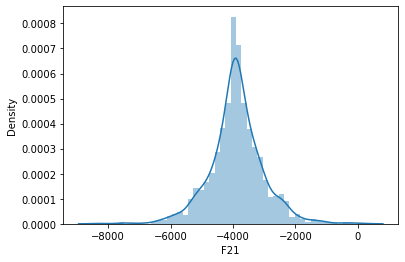

In [36]:
sns.distplot(dataset["F21"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F22', ylabel='Density'>

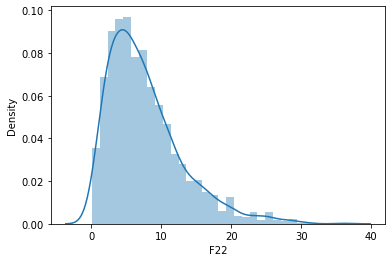

In [37]:
sns.distplot(dataset["F22"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F23', ylabel='Density'>

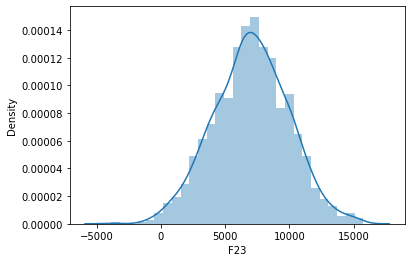

In [38]:
sns.distplot(dataset["F23"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F24', ylabel='Density'>

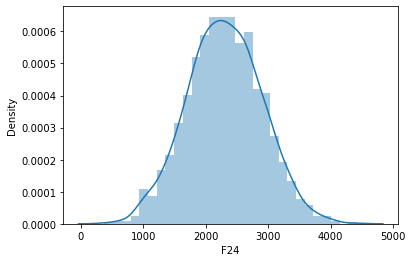

In [39]:
sns.distplot(dataset["F24"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F25', ylabel='Density'>

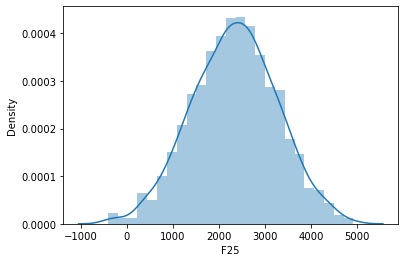

In [40]:
sns.distplot(dataset["F25"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F26', ylabel='Density'>

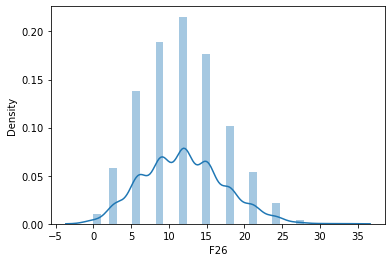

In [41]:
sns.distplot(dataset["F26"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F27', ylabel='Density'>

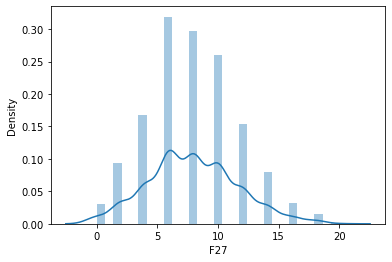

In [42]:
sns.distplot(dataset["F27"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F28', ylabel='Density'>

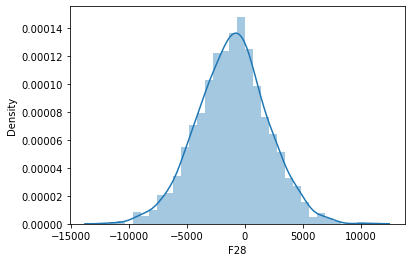

In [43]:
sns.distplot(dataset["F28"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F29', ylabel='Density'>

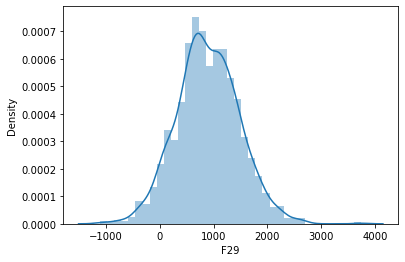

In [44]:
sns.distplot(dataset["F29"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F30', ylabel='Density'>

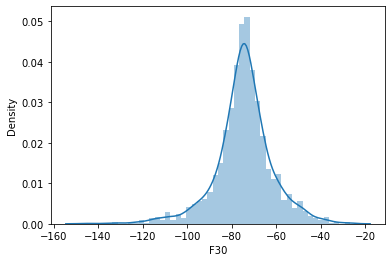

In [45]:
sns.distplot(dataset["F30"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F31', ylabel='Density'>

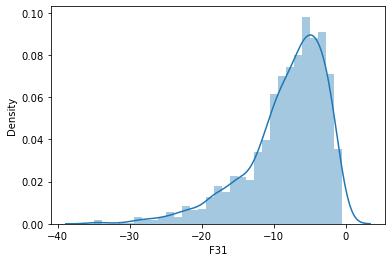

In [46]:
sns.distplot(dataset["F31"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F32', ylabel='Density'>

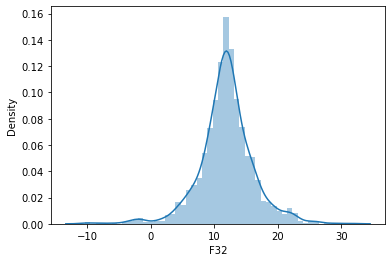

In [47]:
sns.distplot(dataset["F32"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F33', ylabel='Density'>

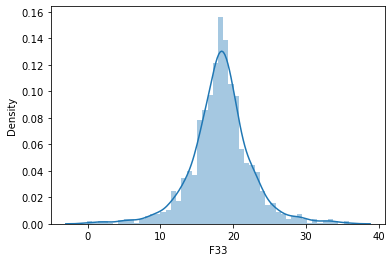

In [48]:
sns.distplot(dataset["F33"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F34', ylabel='Density'>

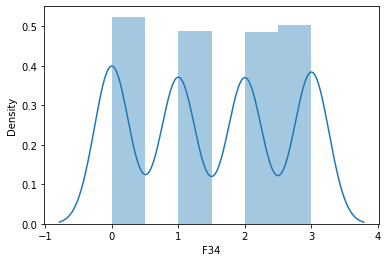

In [49]:
sns.distplot(dataset["F34"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F35', ylabel='Density'>

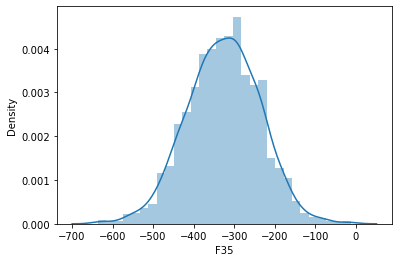

In [50]:
sns.distplot(dataset["F35"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F36', ylabel='Density'>

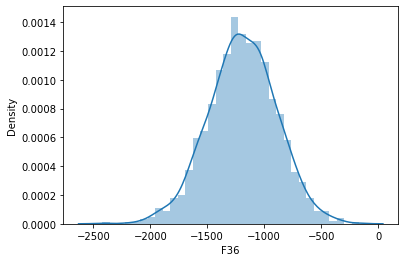

In [51]:
sns.distplot(dataset["F36"])

In [52]:
# Some of the features are asymmetric but the majority of the features have normal distribution but few of them are skewed in nature 
# I will transform the asymmetric features by using standardization and normalising with min, max transformation


In [53]:
X = dataset.drop(columns=["Target"])
y = dataset["Target"]

In [54]:
#Implementing the Standard Scaler to standardize 

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
#Normalising with min and max

min_max = MinMaxScaler()
X = min_max.fit_transform(X)

In [56]:
# Spliting the dataset into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Fitting the data into five different regression models
# Linear Regression, Decision Tree Regressor, Support Vector Regressor, K Nearest Regressor and Gradient Boosting Regressor

In [58]:
#Implementing the Linear Regression 

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_train_predictions = linear_regression.predict(X_train)
linear_regression_test_predictions = linear_regression.predict(X_test)

In [59]:
print(f"Training MAE = {metrics.mean_absolute_percentage_error(y_train, linear_regression_train_predictions)}")
print(f"Testing MAE = {metrics.mean_absolute_percentage_error(y_test, linear_regression_test_predictions)}")

Training MAE = 4.304669205421909
Testing MAE = 2.1114516552082288


In [60]:
#Implementing the Decision Tree Regressor

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)
decision_tree_regressor_train_predictions = decision_tree_regressor.predict(X_train)
decision_tree_regressor_test_predictions = decision_tree_regressor.predict(X_test)

In [61]:
print(f"Training MAE = {metrics.mean_absolute_percentage_error(y_train, decision_tree_regressor_train_predictions)}")
print(f"Testing MAE = {metrics.mean_absolute_percentage_error(y_test, decision_tree_regressor_test_predictions)}")

Training MAE = 0.0
Testing MAE = 3.413329276016054


In [62]:
#Implementing Support Vector Regressor

support_vector_regression = SVR()
support_vector_regression.fit(X_train, y_train)
support_vector_regression_train_predictions = support_vector_regression.predict(X_train)
support_vector_regression_test_predictions = support_vector_regression.predict(X_test)

In [63]:
print(f"Training MAE = {metrics.mean_absolute_percentage_error(y_train, support_vector_regression_train_predictions)}")
print(f"Testing MAE = {metrics.mean_absolute_percentage_error(y_test, support_vector_regression_test_predictions)}")

Training MAE = 5.139907559217107
Testing MAE = 3.214286552856385


In [64]:
#Implementing the K Nearest Regressor

k_nearest_regression = KNeighborsRegressor()
k_nearest_regression.fit(X_train, y_train)
k_nearest_regression_train_predictions = k_nearest_regression.predict(X_train)
k_nearest_regression_test_predictions = k_nearest_regression.predict(X_test)

In [65]:
print(f"Training MAE = {metrics.mean_absolute_percentage_error(y_train, k_nearest_regression_train_predictions)}")
print(f"Testing MAE = {metrics.mean_absolute_percentage_error(y_test, k_nearest_regression_test_predictions)}")

Training MAE = 4.952430252438087
Testing MAE = 3.137947392238614


In [66]:
#Implementing the Gradient Boosting Regressor

gradient_boosting_regression = GradientBoostingRegressor()
gradient_boosting_regression.fit(X_train, y_train)
gradient_boosting_regression_train_predictions = gradient_boosting_regression.predict(X_train)
gradient_boosting_regression_test_predictions = gradient_boosting_regression.predict(X_test)

In [67]:
print(f"Training MAE = {metrics.mean_absolute_percentage_error(y_train, gradient_boosting_regression_train_predictions)}")
print(f"Testing MAE = {metrics.mean_absolute_percentage_error(y_test, gradient_boosting_regression_test_predictions)}")

Training MAE = 2.188083397665065
Testing MAE = 1.9782213461430016


In [68]:
# The eroor rate of the Gradient Boosting Regressor is less as compared to other models
# we can go ahead with its performance properly using Kfold cv

In [69]:
cv_scores = cross_val_score(gradient_boosting_regression, X=X, y=y, scoring='neg_mean_absolute_percentage_error', cv=10)

In [70]:
cv_scores

array([ -2.04927763,  -1.88885621,  -2.10365343,  -1.18488136,
       -11.78917389,  -1.29635362,  -5.51768348,  -1.14407884,
        -2.11012038,  -1.24010322])

### Part B

In [72]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()
test_data["F5"] = label_encoder.fit_transform(test_data["F5"])
test_data["F34"] = label_encoder.fit_transform(test_data["F34"])
test_data = scaler.fit_transform(test_data)
test_data = min_max.fit_transform(test_data)


predicted = gradient_boosting_regression.predict(test_data) # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])